# Morpho Calls vs Post Patch Outcomes

In [10]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import math
import seaborn as sns
%matplotlib inline

In [11]:
ps = pd.read_csv('patch_seq_log_mouse.csv')

In [12]:
initial = ["Date", "Slice (Lims ID?)", "Morph", "cell type","Post patch?", 
           "Post patch pipette R", "Nucleus sucked in?", 
           "Internal version", "PCR cycles", "SM_QC_PF", "Bad dates"]
ps = ps[initial]

#Changing Date Format
ps["Date"] = pd.to_datetime(ps["Date"], format = "%y%m%d")

#Categories
ps["Post patch?"] = ps["Post patch?"].astype("category")
ps["PCR cycles"] = ps["PCR cycles"].astype("category")
ps["SM_QC_PF"] = ps["SM_QC_PF"].astype("category")
ps["Bad dates"] = ps["Bad dates"].astype("category")

#Filtering Columns
ps = ps[ps["PCR cycles"] == 21]      #Shows 21 pcr cycles
ps = ps[ps["SM_QC_PF"] != "cnt"]     #Shows everything except cnt
ps = ps[ps["Bad dates"] != "x"]      #Shows everthing except x
ps = ps[ps["cell type"] == "tdt+"]

#Dropping blank columns
ps = ps.drop("Bad dates", 1)
ps.dropna(subset = ["Post patch?", "Morph"], inplace = True)
ps.head()

,Date,Slice (Lims ID?),Morph,cell type,Post patch?,Post patch pipette R,Nucleus sucked in?,Internal version,PCR cycles,SM_QC_PF
1682,2017-04-21,Gad2-IRES-Cre;Ai14-313294.03.01,n,tdt+,No-Seal,NaN,NaN,AiV2,21.0,pass
1683,2017-04-21,Gad2-IRES-Cre;Ai14-313294.03.01,n,tdt+,No-Seal,NaN,NaN,AiV2,21.0,pass
1684,2017-04-21,Gad2-IRES-Cre;Ai14-313294.03.01,n,tdt+,No-Seal,NaN,NaN,AiV2,21.0,fail
1685,2017-04-21,Gad2-IRES-Cre;Ai14-313294.03.01,n,tdt+,No-Seal,NaN,NaN,AiV2,21.0,pass
1686,2017-04-21,Gad2-IRES-Cre;Ai14-313294.04.01,n,tdt+,No-Seal,NaN,NaN,AiV2,21.0,pass


## Definitions

In [13]:
def nucleated(x):
    nucleus = x[(x["Post patch?"] == "Nucleated") | (((x["Post patch?"] == "nucleus_visible") | (x["Post patch?"] == "nucleus_present")) & (x["Post patch pipette R"] >= 500))]
    return nucleus

def partial_nucleated(y):
    partial = y[(y["Post patch?"] == 'Partial-Nucleus') | (((y['Post patch?'] == 'nucleus_present') | (y['Post patch?'] == 'nucleus_visible')) & (y["Post patch pipette R"] <= 499))]
    return partial

def outside_out(z):
    outside = z[(z["Post patch?"] == 'Outside-Out') | (((z['Post patch?'] == 'nucleus_absent') | (z['Post patch?'] == 'no_nuclues_visible')) & (z['Post patch pipette R'] >= 500))]
    return outside

def no_seal(w): 
    no = w[(w["Post patch?"] == 'No-Seal') | (((w['Post patch?'] == 'nucleus_absent') | (w['Post patch?'] == 'no_nucleus_visible')) & (w['Post patch pipette R'] <= 499))]
    return no
    
def entire_cell(v):
    entire = v[(v["Post patch?"] == 'Entire-Cell') | (v['Post patch?'] == 'entire_cell')]
    return entire

## Setting Variables

In [14]:
oo = outside_out(ps)
oo['post patch class'] = 'Outside out'
nu = nucleated(ps)
nu['post patch class'] = 'Nucleated'
ns = no_seal(ps)
ns['post patch class'] = 'No seal'
pn = partial_nucleated(ps)
pn['post patch class'] = 'Partial nucleated'

#Not including entire cell with plot
#ec = entire_cell(ps)
#ec['post patch class'] = 'Entire cell'

frames = (nu, pn, oo, ns)
ps = pd.concat(frames)
ps.head()

C:\Users\ramr\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ramr\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\ramr\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,Date,Slice (Lims ID?),Morph,cell type,Post patch?,Post patch pipette R,Nucleus sucked in?,Internal version,PCR cycles,SM_QC_PF,post patch class
1688,2017-04-21,Gad2-IRES-Cre;Ai14-313294.04.01,n,tdt+,Nucleated,NaN,NaN,AiV2,21.0,pass,Nucleated
1692,2017-04-21,Gad2-IRES-Cre;Ai14-313294.03.02,n,tdt+,Nucleated,NaN,NaN,AiV2,21.0,pass,Nucleated
1693,2017-04-21,Gad2-IRES-Cre;Ai14-313294.03.02,y,tdt+,Nucleated,NaN,NaN,AiV2,21.0,pass,Nucleated
1701,2017-04-21,Gad2-IRES-Cre;Ai14-313294.05.01,n,tdt+,Nucleated,NaN,NaN,AiV2,21.0,pass,Nucleated
1717,2017-04-24,Rorb-IRES2-Cre;Ai14-315898.03.01,y,tdt+,Nucleated,NaN,NaN,AiV2,21.0,pass,Nucleated


## Plots

In [15]:
ps = ps[["Date", "Morph", "Internal version", "SM_QC_PF", "post patch class"]]
ps = ps[(ps['Morph'] == 'n') | (ps['Morph'] == 'y') | (ps['Morph'] == 'q')]

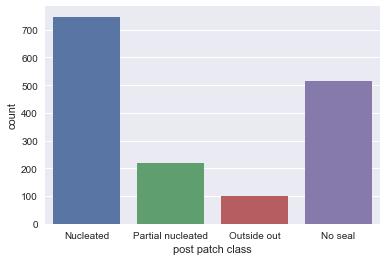

In [20]:
sns.countplot(x="post patch class", data=ps);

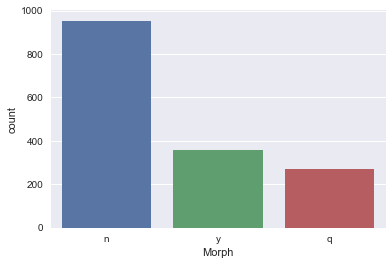

In [21]:
sns.countplot(x="Morph", data=ps);

In [22]:
sns.factorplot(x="post patch class", y="Morph", data=ps, kind="bar");

ValueError: Neither the `x` nor `y` variable appears to be numeric.